<a href="https://colab.research.google.com/github/amol9359/Project-of-mushroom-classifcation/blob/main/Project_of_classification_of_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms (1).csv to mushrooms (1).csv


Problem Statement

To build a classification methodology to predict the type of Mushroom and whether it is edible or poisnous based on the given training data.

Mushroom Classification Using Different Classifiers
In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.


Importing the packages

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Checking the files in the directory

Reading the csv file of the dataset
Pandas read_csv() function imports a CSV file (in our case, ‘mushrooms.csv’) to DataFrame format.

In [ ]:
df1 = pd.read_csv("/content/mushrooms (1).csv")

In [ ]:
####Examining the Data
#After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [ ]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1.class_ep: edible=e, poisonous=p

2.cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

3.cap_surface: fibrous=f,grooves=g,scaly=y,smooth=

4.cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

5.bruises: bruises=t,no=f

6.odor:almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

7.gill_attachment: attached=a,descending=d,free=f,notched=n

8.gill_spacing: close=c,crowded=w,distant=d

9.gill_size: broad=b,narrow=n

10.gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

11.stalk_shape: enlarging=e,tapering=t

12.stalk_root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

13.stalk_surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

14.stalk_surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

15.stalk_color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16.stalk_color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

17.veil_type: partial=p,universal=u

18.veil_color: brown=n,orange=o,white=w,yellow=y

19.ring_number: none=n,one=o,two=t

20.ring_type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

21.spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

22.population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

23.habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df1['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
print("Dataset shape:", df1.shape)

Dataset shape: (8124, 23)


In [ ]:
df1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

So there are no missing vlaues in our data. But when you go through the data, you will find that missing values in one column is replaced with '?'. We need to handle it.

In [ ]:
for column in df1.columns:
    count = df1[column][df1[column]=='?'].count()
    if count!=0:
        print(column, df1[column][df1[column]=='?'].count())

stalk-root 2480


There are 2480 missing values in "stalk-root" column. Let's replace such values with numpy "nan" so that we can handle the missing values.

In [ ]:
df1["stalk-root"] =df1["stalk-root"].replace('?',np.nan)  

In [ ]:
df1.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now we can see the missing values in the stalk-root column. we will impute these missing values.

In [ ]:
for column in df1.columns:
    print(column,df1[column].nunique())    

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


Here "veil-type" column has only one unique category. This column won't give much information ,so let's drop it.

In [ ]:
df1= df1.drop(['veil-type'],axis=1)

Visualizing the count of edible and poisonous mushrooms

In [ ]:
!pip install autoimpute

     |████████████████████████████████| 97 kB 4.5 MB/s 


In [ ]:
from autoimpute.imputations import SingleImputer,MultipleImputer
from autoimpute.imputations.series import MultinomialLogisticImputer

In [ ]:
impute = SingleImputer(strategy='categorical')

In [ ]:
impute.fit(df1)

SingleImputer(strategy='categorical')

In [ ]:
df=impute.transform(df1)

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,b,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,c,s,k,w,w,w,o,e,w,v,l


In [ ]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
df["class"].unique()

array(['p', 'e'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


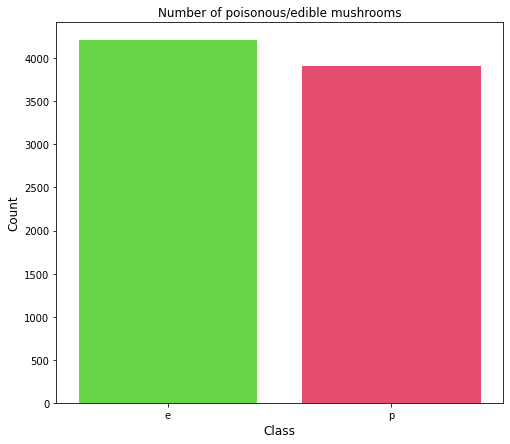

In [ ]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

In [ ]:
#The dataset is balanced.

In [ ]:
def plot_column(x, y):
    plt.figure(figsize=(12, 6))                   
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Number of the Mushrooms', fontsize=14)
    plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
    plt.title(f'Edible or Poisonous Based on {y}', fontsize=20)
    plotcolumn = sns.countplot(data=df, x=x ,hue='class',order=x.value_counts().index, palette=['red', 'lightgreen'])                     
    for p in plotcolumn.patches:
        plotcolumn.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center')

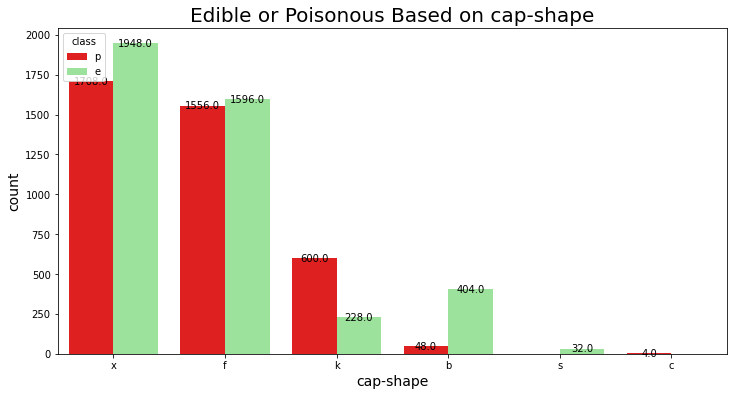

In [ ]:
plot_column(df['cap-shape'], 'cap-shape')

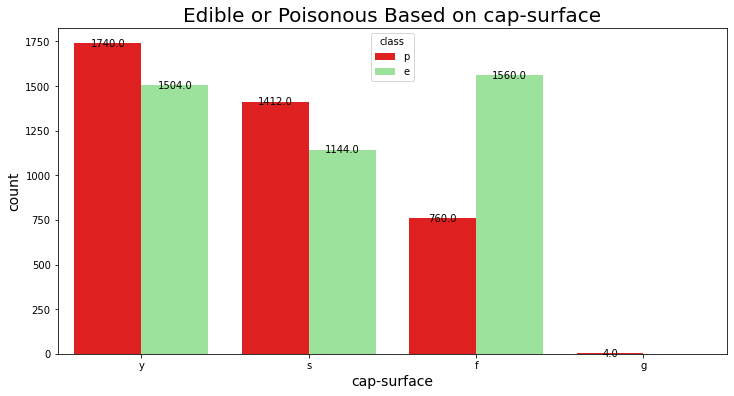

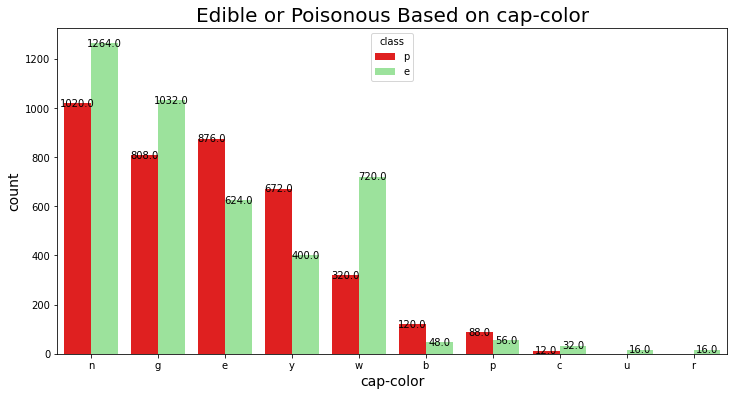

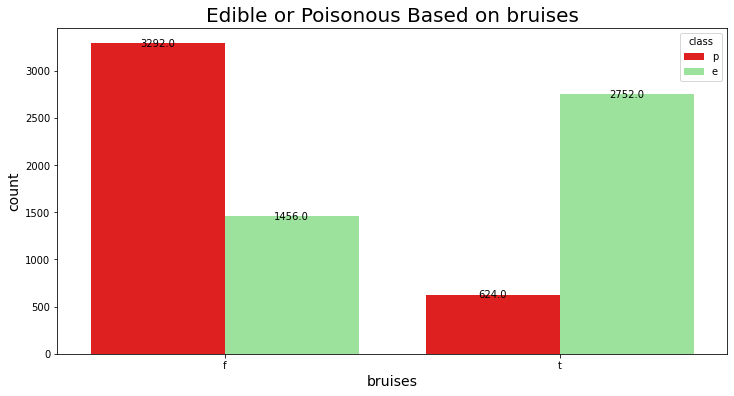

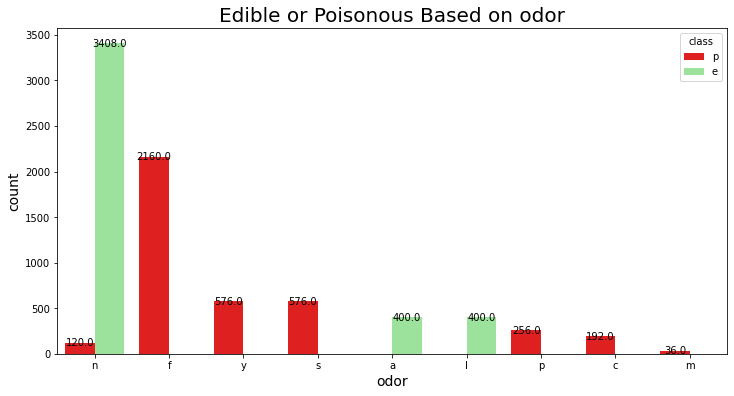

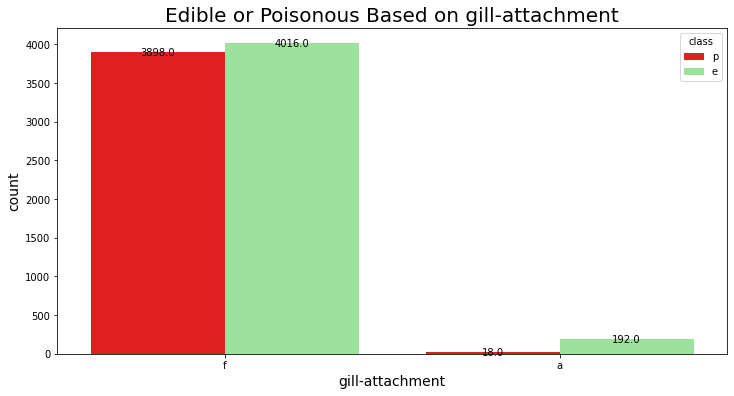

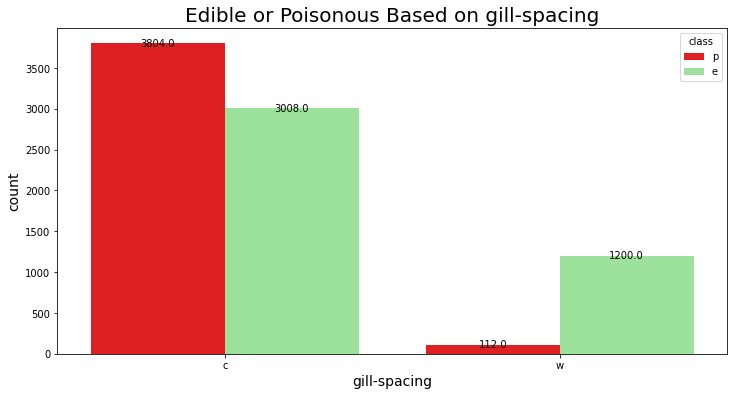

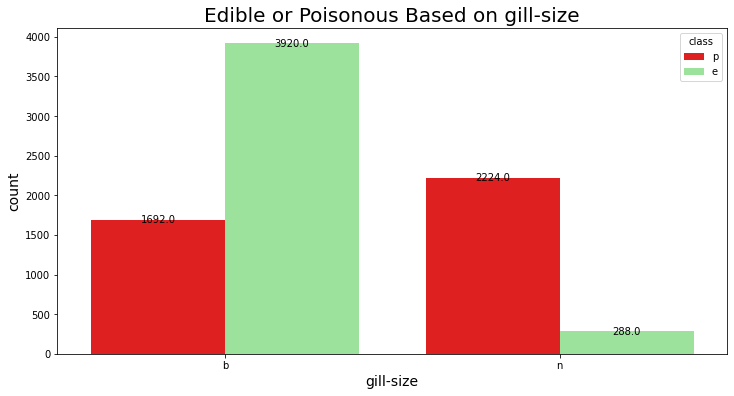

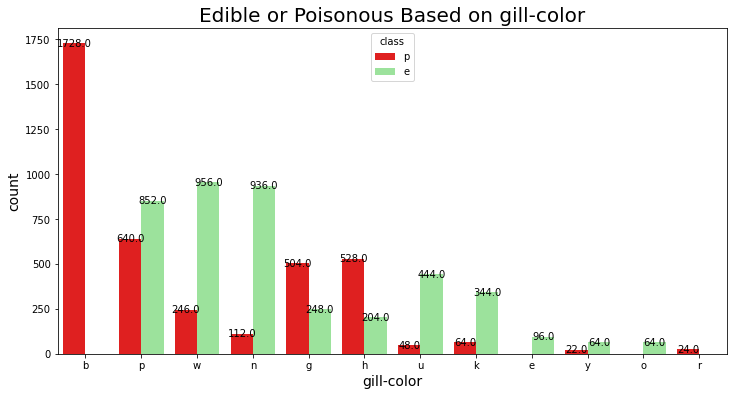

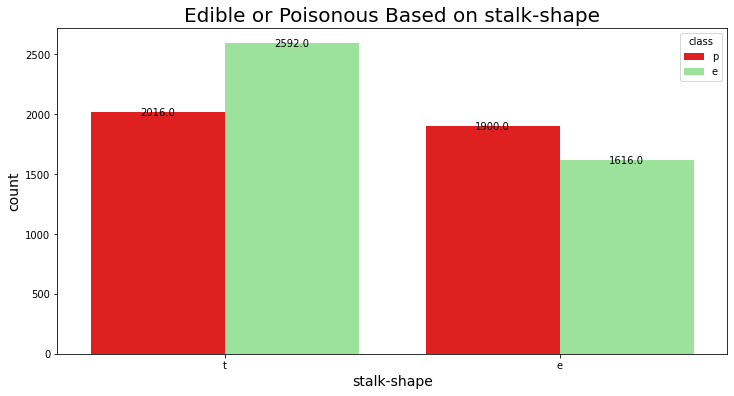

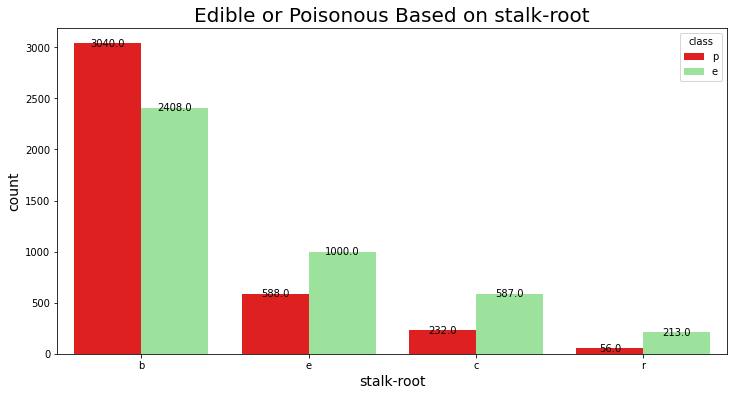

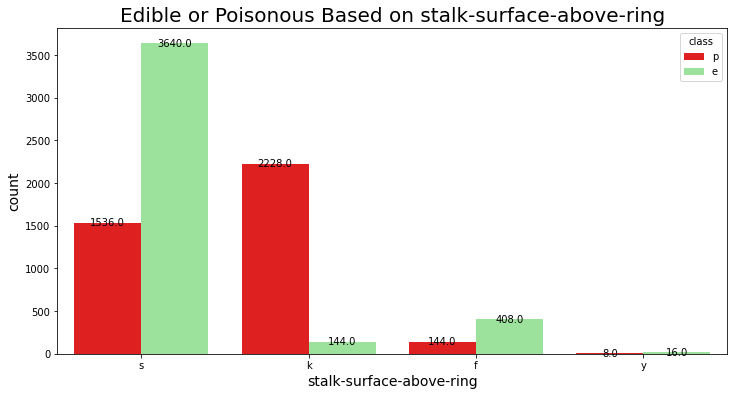

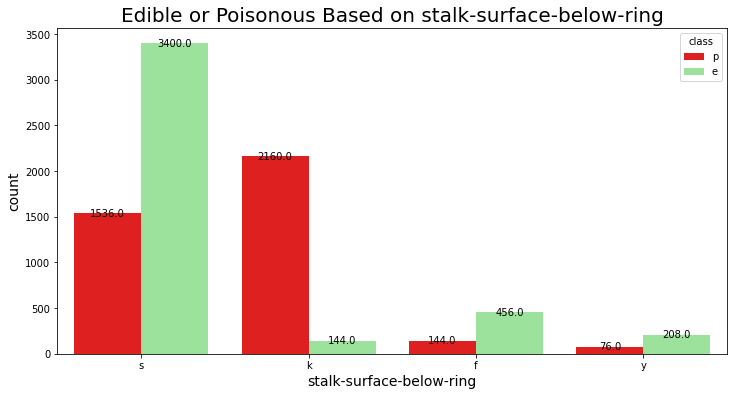

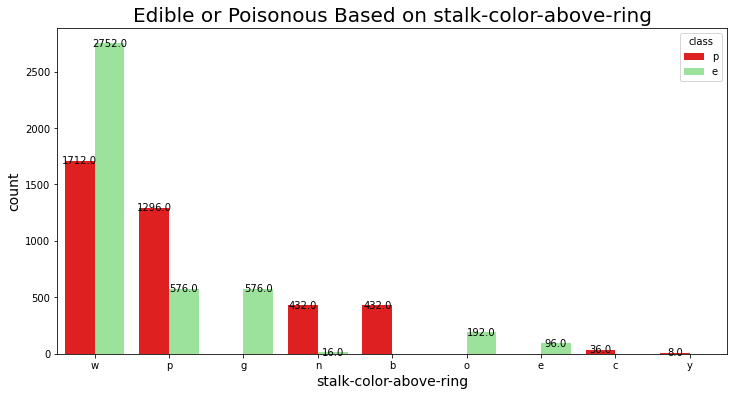

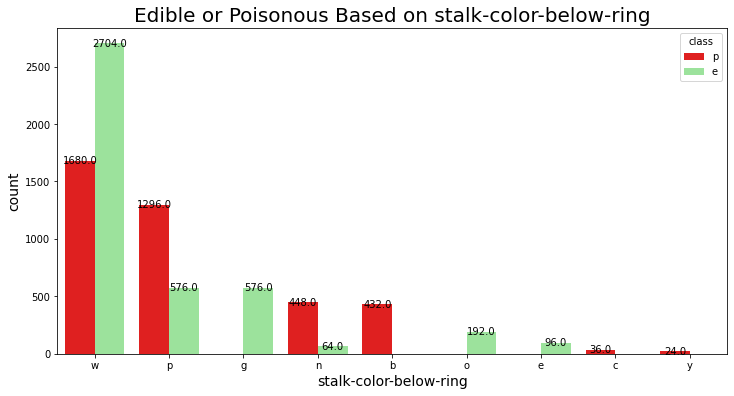

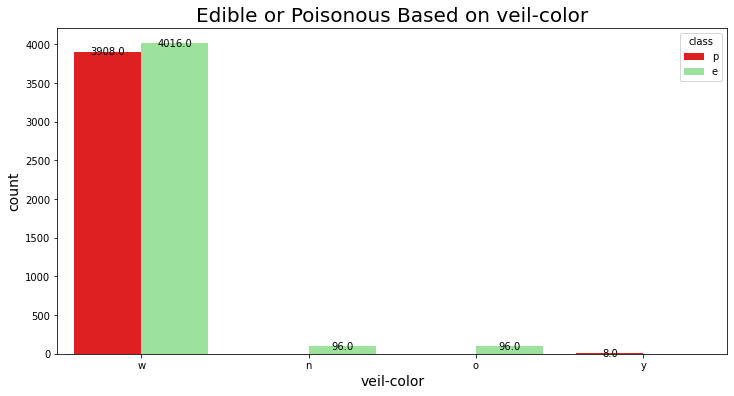

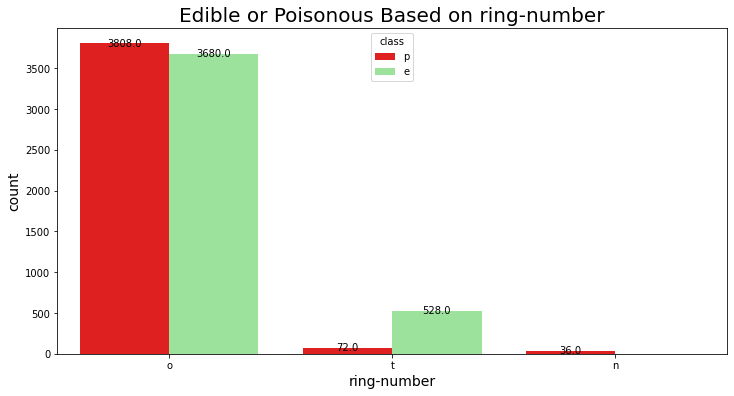

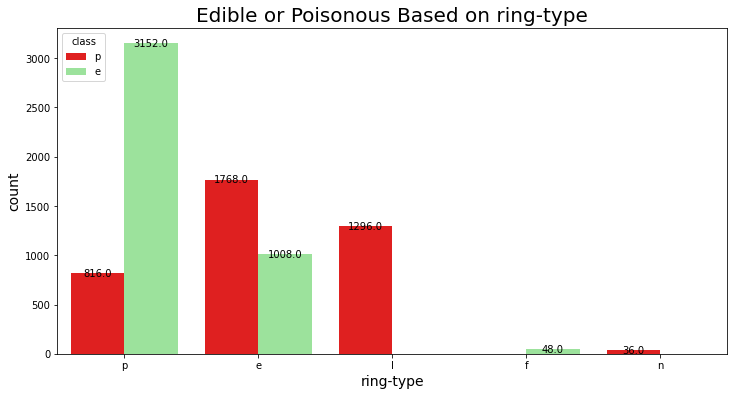

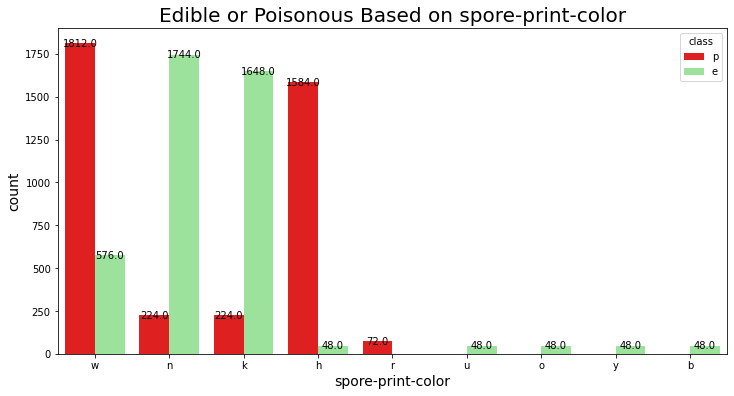

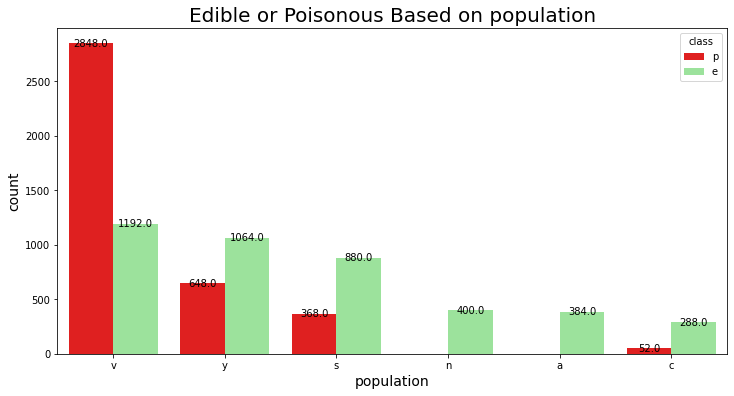

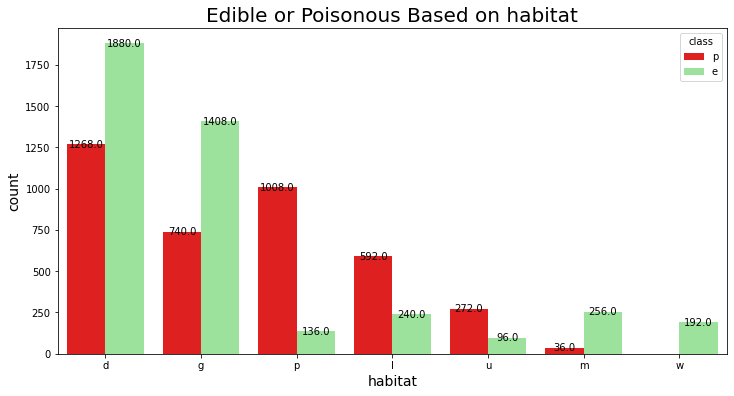

In [ ]:
cols = ['cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for col in cols:
    plot_column(df[col], col)
    

The below diagram represents the relation between various cap qualities contributing towards edibility of mushroom

In [ ]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode,iplot


In [ ]:
classep_dim = go.parcats.Dimension(
    values=df["class"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=df["cap-shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=df["cap-surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=df["cap-color"].values,
  label="Cap Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in df["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[classep_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data1)


The below diagram represents the relation between various gill qualities contributing towards edibility of mushroom

In [ ]:
gill_attachment_dim = go.parcats.Dimension(
    values=df["gill-attachment"].values,
    label="Gill Attachment"
)

gill_spacing_dim = go.parcats.Dimension(
  values=df["gill-spacing"].values,
  label="Gill Spacing"
)
gill_size_dim = go.parcats.Dimension(
  values=df["gill-size"].values,
  label="Gill Size"
)
gill_color_dim = go.parcats.Dimension(
  values=df["gill-color"].values,
  label="Gill Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in df["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data2 = [
    go.Parcats(
        dimensions=[classep_dim,gill_attachment_dim,gill_spacing_dim,gill_size_dim,gill_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]

iplot(data2)

The below diagram represents the relation between various stalk qualities contributing towards edibility of mushroom

In [ ]:
stalk_shape_dim = go.parcats.Dimension(
    values=df["stalk-shape"].values,
    label="Stalk Shape"
)

stalk_root_dim = go.parcats.Dimension(
  values=df["stalk-root"].values,
  label="Stalk Root"
)
stalk_surface_above_ring_dim = go.parcats.Dimension(
  values=df["stalk-surface-above-ring"].values,
  label="Stalk Surface Above Ring"
)
stalk_surface_below_ring_dim = go.parcats.Dimension(
  values=df["stalk-surface-below-ring"].values,
  label="Below Ring"
)
stalk_color_above_ring_dim = go.parcats.Dimension(
  values=df["stalk-color-above-ring"].values,
  label="Stalk Color Above Ring"
)
stalk_color_below_ring_dim = go.parcats.Dimension(
  values=df["stalk-color-below-ring"].values,
  label="Below Ring"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in df["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data3 = [
    go.Parcats(
        dimensions=[classep_dim,stalk_shape_dim,stalk_root_dim,stalk_surface_above_ring_dim,stalk_surface_below_ring_dim,stalk_color_above_ring_dim,stalk_color_below_ring_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data3)


The below diagram represents the relation between various veil qualities contributing towards edibility of mushroom

In [ ]:
veil_color_dim = go.parcats.Dimension(
  values=df["veil-color"].values,
  label="Veil Color"
)
# Create parcats trace
color = [1 if i=="e" else 0 for i in df["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data4 = [
    go.Parcats(
        dimensions=[classep_dim,veil_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data4)


The below diagram represents the relation between various ring qualities contributing towards edibility of mushroom

In [ ]:
ring_number_dim = go.parcats.Dimension(
    values=df["ring-number"].values,
    label="Ring Number"
)

ring_type_dim = go.parcats.Dimension(
  values=df["ring-type"].values,
  label="Ring Type"
)
# Create parcats trace
color = [1 if i=="e" else 0 for i in df["class"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data5 = [
    go.Parcats(
        dimensions=[classep_dim,ring_number_dim, ring_type_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )

]


iplot(data5)


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df['spore-print-color'].value_counts().keys()

Index(['w', 'n', 'k', 'h', 'r', 'u', 'o', 'y', 'b'], dtype='object')

Below are pie charts of percentage unique values in the following columns- 'bruises', 'odor', 'spore_print_color', 'population', 'habitat'

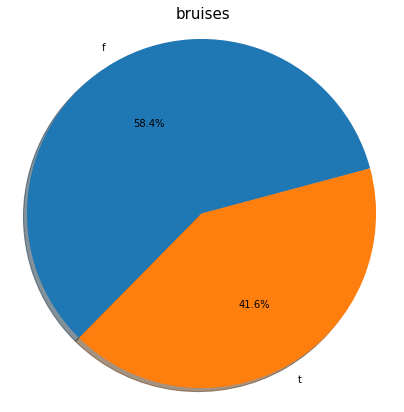

In [ ]:
plt.pie(df['bruises'].value_counts(),labels=df['bruises'].value_counts().keys(), autopct='%1.1f%%', startangle=15, shadow = True)
plt.title('bruises', fontsize= 15)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Outputview of pie charts for remanining mentioned columns

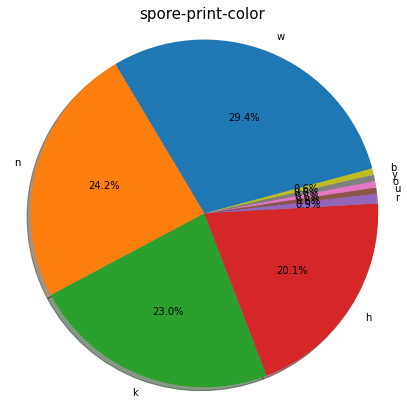

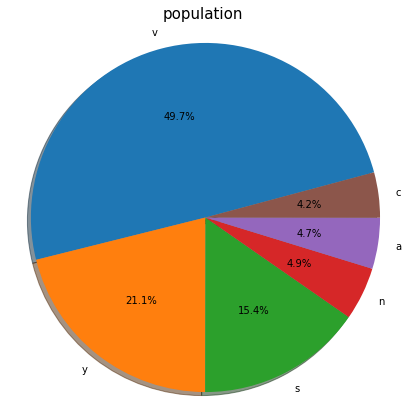

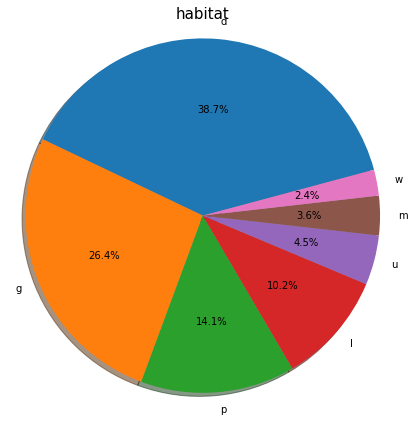

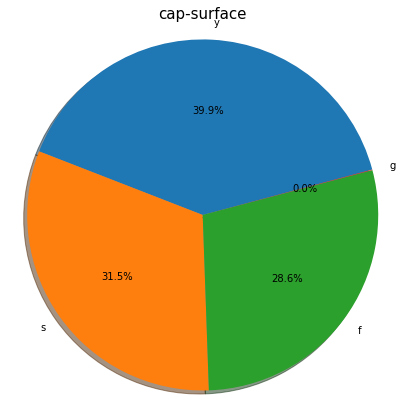

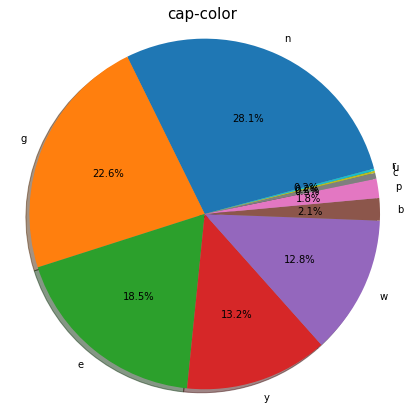

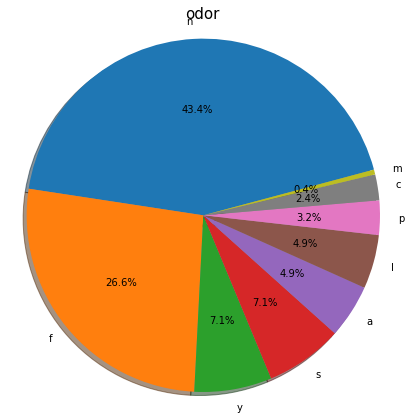

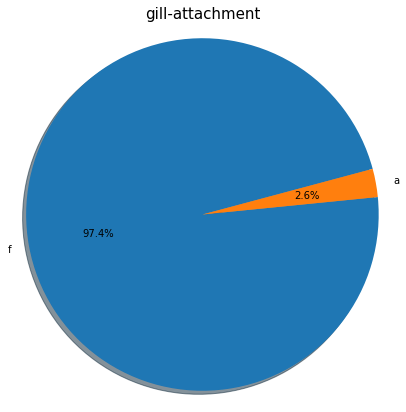

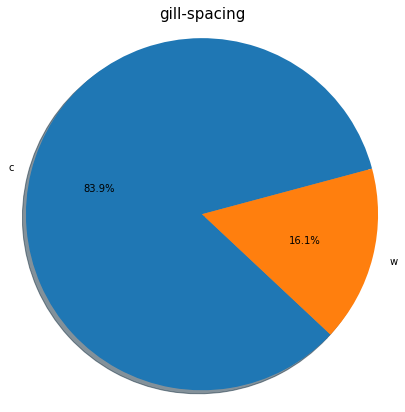

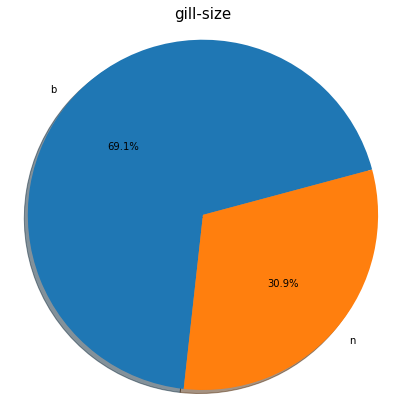

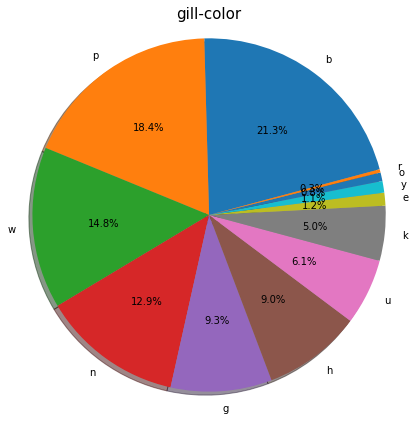

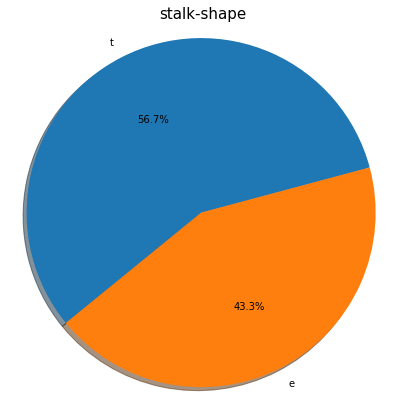

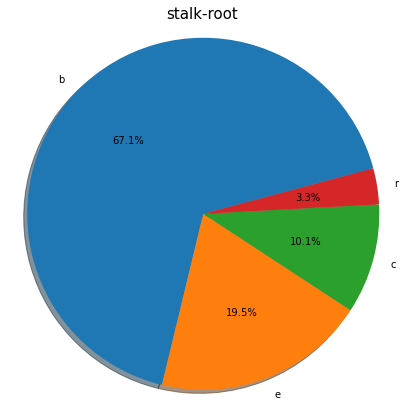

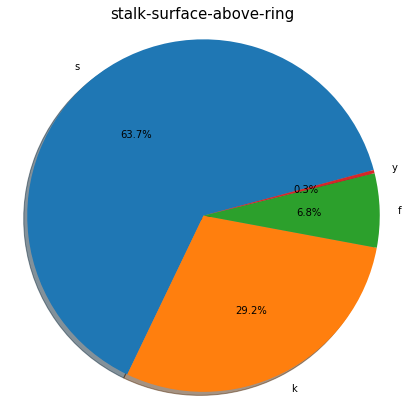

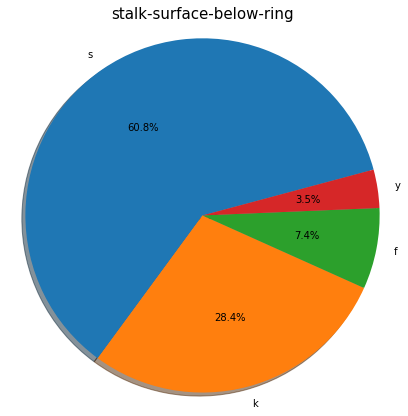

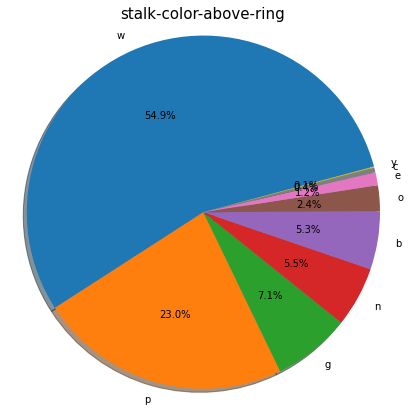

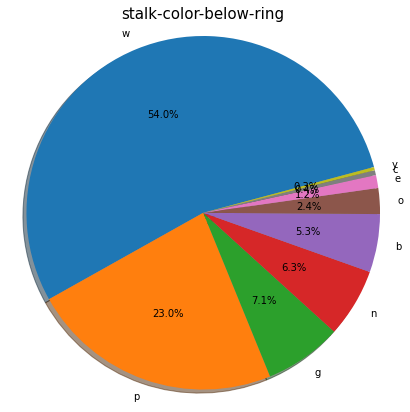

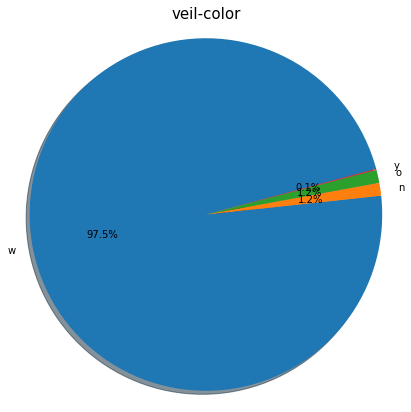

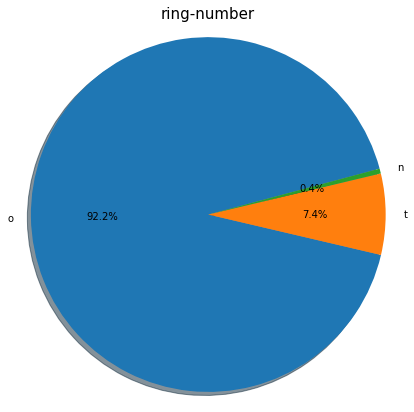

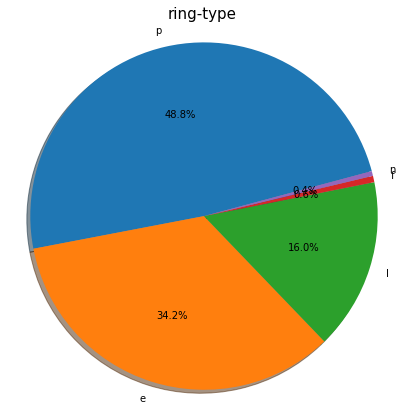

In [ ]:
cols =['spore-print-color', 'population', 'habitat','cap-surface', 'cap-color','odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number',
       'ring-type']
for col in cols:
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().keys(), autopct='%1.1f%%', startangle=15, shadow = True)
    plt.title(f'{col}', fontsize= 15)
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

Data Manipulation

The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

```
# This is formatted as code
```



In [ ]:
df = df.astype('category')

In [ ]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [ ]:

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.head()
df=pd.DataFrame(df)


In [ ]:
df.to_excel("mushrooms.xlsx")

In [ ]:
features = df.columns[1:].tolist()

print(features)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


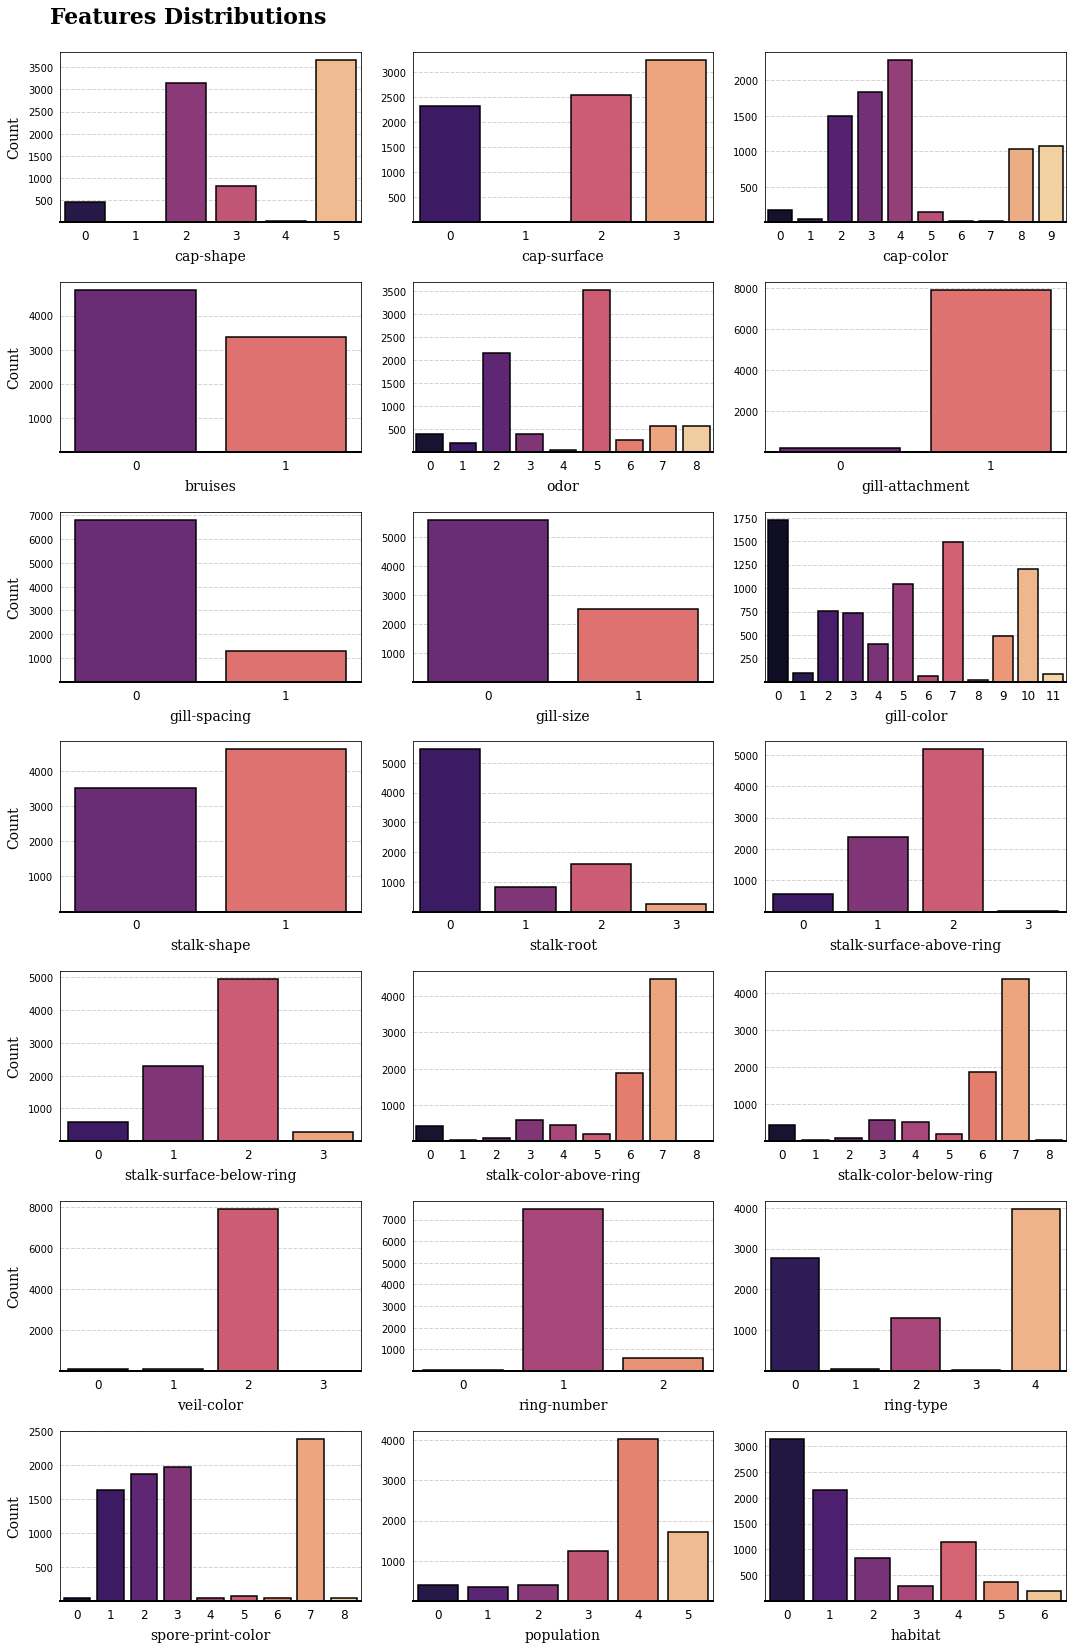

In [ ]:
rows = 8
cols = 3
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")

for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette='magma', data=df, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    #hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold", fontfamily="serif")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

In [ ]:
def plot_column(x, y):
    plt.figure(figsize=(12, 6))                   
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Number of the Mushrooms', fontsize=14)
    plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
    plt.title(f'Edible or Poisonous Based on {y}', fontsize=20)
    plotcolumn = sns.countplot(data=df, x=x ,hue='class_ep',order=x.value_counts().index, palette=['red', 'lightgreen'])                     
    for p in plotcolumn.patches:
        plotcolumn.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center')

In [ ]:
#Quick look at the characteristics of the data
#The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.


In [ ]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

In [ ]:
##Let's look at the correlation between the variables

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [ ]:
#Usually, the least correlating variable is the most important one for classification. 
#In this case, "gill-color" has -0.53 so let's look at it closely.

In [ ]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

In [ ]:
#Let's look closely at the feature "gill-color".

In [ ]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')

In [ ]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=900, bbox_inches='tight')

**Preparing the Data**

Setting X and y axis and splitting the data into train and test respectively.

In [ ]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)  

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
# can we assume anything from our sample
significance = 0.025
# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a, sample_size_a = (410, 500)
sample_success_b, sample_size_b = (379, 400)
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
 

**Classification Methods**

1. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

**Feature importance**

By all methods examined before the feature that is most important is "gill-color".

In [ ]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [ ]:
# Predicting and estimating the result

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

In [ ]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Confusion Matrix for Decision Tree Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

2. Logistic Regression Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Classification report of Logistic Regression Classifier

In [ ]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Confusion Matrix for Logistic Regression Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

3. KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Classification report of KNN Classifier

In [ ]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

Confusion Matrix for KNN Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

4. SVM Classification

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Classification report of SVM Classifier

In [ ]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

Confusion Matrix for SVM Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

5. Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Classification report of Naive Bayes Classifier

In [ ]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Confusion Matrix for Naive Bayes Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

6. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Classification report of Random Forest Classifier

In [ ]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Classifier

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

Predictions

Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [ ]:
preds = dt.predict(X_test)

print(preds[:34])
print(y_test[:34].values)

# 0 - Edible
# 1 - Poisonous

7.Artificial neural network

In [ ]:
#Feature Scaling i.e Standardisation or Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Making the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()
# Adding first hidden layer
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.astype('float64'), batch_size = 10, epochs = 25) #ValueError if y_train datatype not changed

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
for i in range(y_pred.shape[0]):
    if y_pred[i,0] > 0.5: #using 50% as a threshold
        y_pred[i,0] = 1
    else:
        y_pred[i,0] = 0
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_test = y_test.astype('float32') #to match y_pred's datatype
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ANN ');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [ ]:
#Evaluating our classification model
scores = classifier.evaluate(X_test, y_test)
print('Scores accuracy: %.2f%%' % (scores[1]*100))
#Using our confusion matrix
accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('Confusion matrix accuracy: %.2f%%' % (accuracy*100))
precision = cm[0,0]/(cm[0,0]+cm[0,1])
print('Confusion matrix precision: %.2f%%' % (precision*100))
recall = cm[0,0]/(cm[0,0]+cm[1,0])
print('Confusion matrix recall: %.2f%%' % (recall*100))
f1Score = 2*precision*recall/(precision+recall)
print('Confusion matrix f1Score: %.2f%%' % (f1Score*100))

As we can see the predicted and the true values match 100%.

Conclusion

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.

In [ ]:
from sklearn.model_selection import cross_validate
# Create a dictionary with the model which will be tested
models = {
    "GaussianNB":{"model":GaussianNB()},
    "KNeighborsClassifier":{"model":KNeighborsClassifier() },
    "DecisionTreeClassifier":{"model":DecisionTreeClassifier() },
    "SVC":{"model":SVC() },
    "RandomForestClassifier":{"model":RandomForestClassifier() },
}
# Use the 10-fold cross validation for each model
# to get the mean validation accuracy and the mean training time
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result = cross_validate(model, X_train,y_train,cv = 10)
    
    # Mean accuracy and mean training time
    mean_val_accuracy = round( sum(result['test_score']) / len(result['test_score']), 4)
    mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['val_accuracy'] = mean_val_accuracy
    m['Training time (sec)'] = mean_fit_time
    
    # Display the result
    print(f"{name:27} mean accuracy using 10-fold cross validation: {mean_val_accuracy*100:.2f}% - mean training time {mean_fit_time} sec")

In [ ]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    lst = [name, v['val_accuracy'],v['Training time (sec)']]
    models_result.append(lst)

df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','Training time (sec)'])
df_results.sort_values(by='val_accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results